<a href="https://colab.research.google.com/github/BahodirML/AI_Projects/blob/main/Cat_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import fastai

In [4]:
from fastai.vision.all import *
from ipywidgets import widgets

path = untar_data(URLs.PETS)/'images'

In [5]:
def is_cat(x): return x[0].isupper()


dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct = 0.2, seed = 42,
    label_func = is_cat, item_tfms = Resize(224)
)

In [6]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [7]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.169233,0.018774,0.994587,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.074254,0.013543,0.997294,00:51
1,0.041659,0.004668,0.997294,00:50


In [8]:
upload = widgets.FileUpload()
upload


FileUpload(value={}, description='Upload')

Cat?: True
Accuracy: 0.933


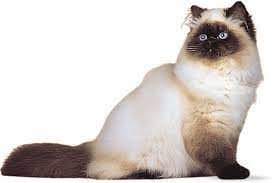

In [10]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Cat?: {pred}')
print(f'Accuracy: {prob[1].item():.3f}')
img